In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (19,4))

In [2]:
dados = pd.read_csv("F:/Cursos/ALURA/Formação Data Science/Python Pandas - Tratando e analisando dados/ALURA - JUPYTER/aluguel_residencial_tratado_drop.csv", sep= ";")

<Axes: >

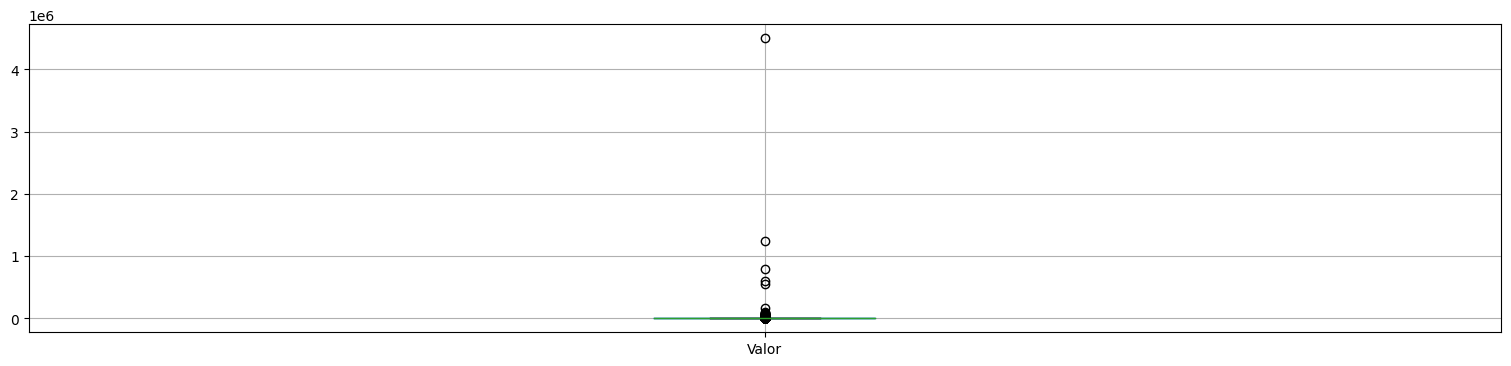

In [3]:
dados.boxplot(['Valor'])

In [4]:
dados[dados['Valor'] >= 500000]


,Unnamed: 0,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7629,7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [5]:
valor = dados['Valor']

In [6]:
valor_maximo = dados['Valor'].max()


In [7]:
df_maximo = dados.loc[dados['Valor'] == valor_maximo]
df_maximo


,Unnamed: 0,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
15520,15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.0,Apartamento


In [8]:
Q1 = valor.quantile(.25)
Q1


1600.0

In [9]:
Q3 = valor.quantile(.75)
Q3

5500.0

In [10]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [11]:
df = pd.DataFrame({
    'resul': ['a', 'b', 'c', 'd'],
    'vas': [100, 55, 45, 28]
})
df

,resul,vas
0,a,100
1,b,55
2,c,45
3,d,28


In [12]:
valores = df['vas']
valores

0    100
1     55
2     45
3     28
Name: vas, dtype: int64

In [13]:
quan = valores.quantile(.5)
quan

50.0

In [14]:
selecao = (valor >=limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]


<Axes: >

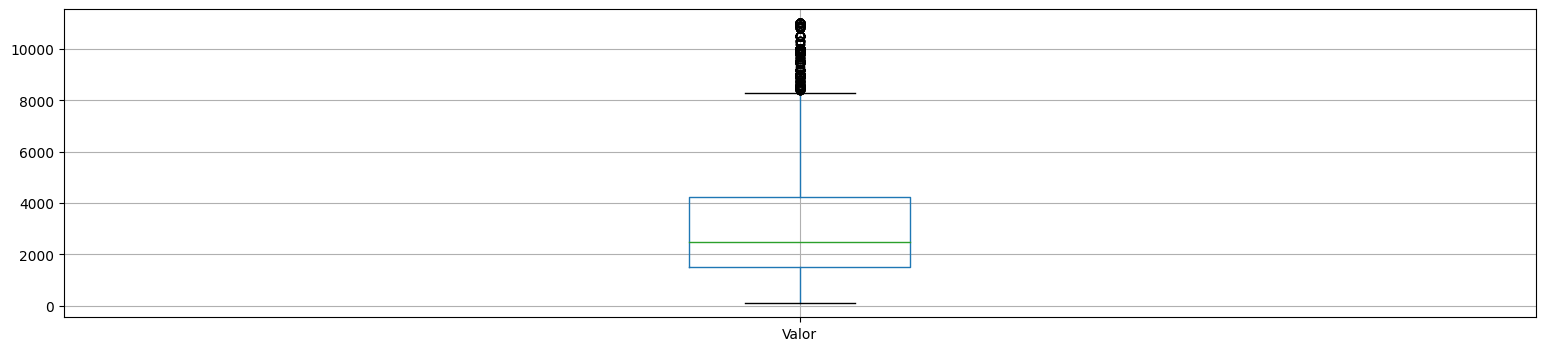

In [15]:
dados_new.boxplot(['Valor'])

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

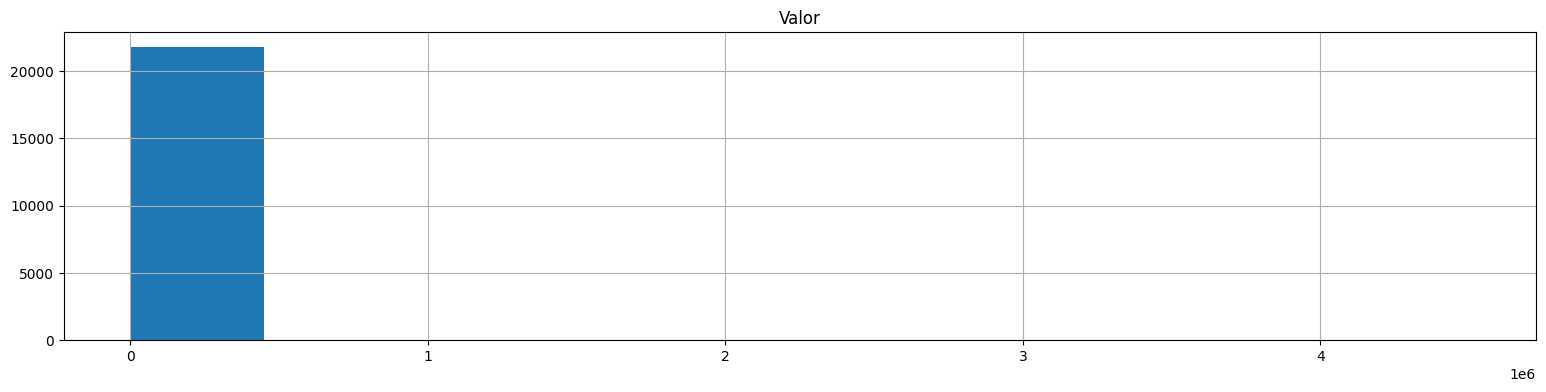

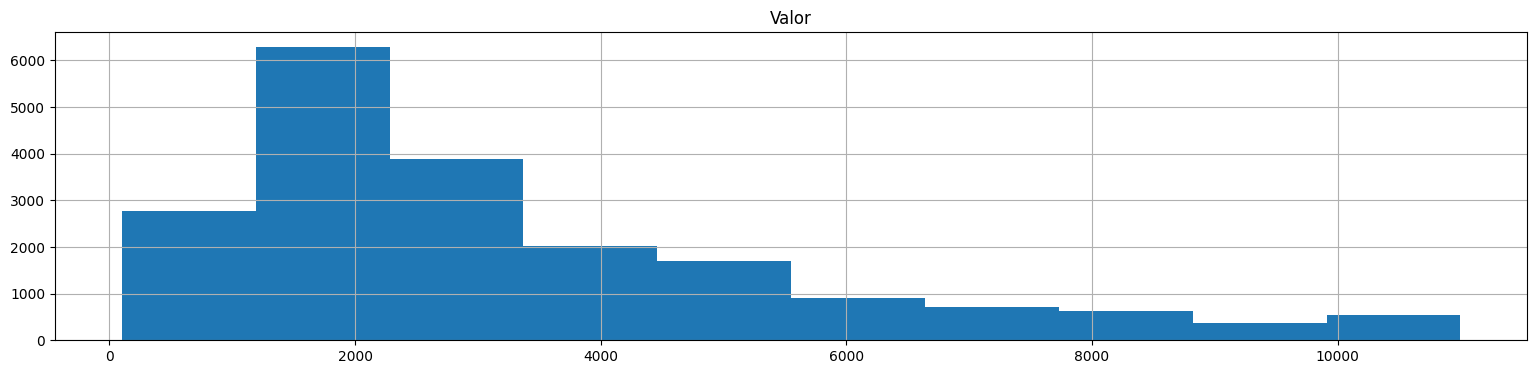

In [16]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

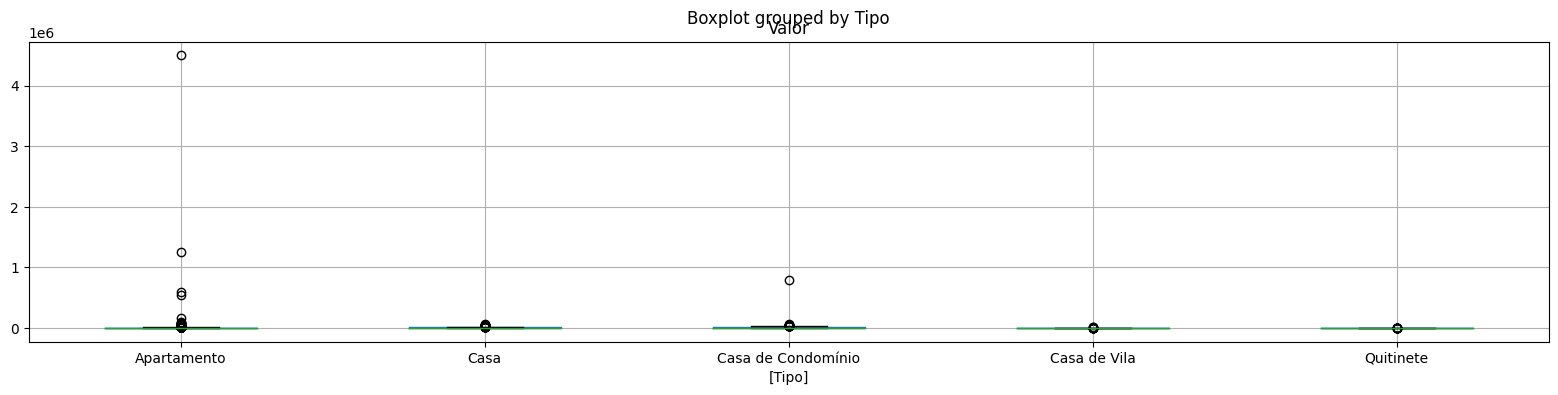

In [17]:
dados.boxplot(['Valor'], by = ['Tipo'])

**aqui mostra de maneira que não queremos agrupar, pois agrupa como dataframe e queremos series**

In [18]:
grupo_tipoo = dados.groupby('Tipo')

In [19]:
type(grupo_tipoo)

pandas.core.groupby.generic.DataFrameGroupBy

**Aqui o modo correto**

In [20]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [21]:
grupo_tipo

In [22]:
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 7, 8, 9, 11, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, ...], 'Casa': [1, 22, 54, 57, 96, 100, 144, 160, 180, 238, 250, 253, 264, 286, 310, 316, 334, 339, 357, 378, 385, 399, 424, 434, 474, 475, 481, 511, 542, 543, 567, 571, 572, 618, 621, 630, 635, 636, 660, 676, 700, 721, 724, 760, 771, 780, 856, 873, 937, 982, 1029, 1036, 1118, 1123, 1125, 1157, 1178, 1249, 1256, 1316, 1335, 1350, 1371, 1412, 1426, 1430, 1440, 1445, 1472, 1475, 1488, 1586, 1604, 1656, 1662, 1666, 1671, 1684, 1709, 1717, 1762, 1810, 1835, 1875, 1905, 1933, 1942, 1960, 2019, 2039, 2056, 2075, 2101, 2107, 2108, 2133, 2170, 2201, 2204, 2211, ...], 'Casa 

In [23]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [24]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [25]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [26]:
for tipo in grupo_tipo.groups.keys():
    print(tipo)

Apartamento
Casa
Casa de Condomínio
Casa de Vila
Quitinete


In [27]:
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    print(eh_tipo)

0        False
1        False
2         True
3         True
4         True
         ...  
21821     True
21822    False
21823     True
21824     True
21825     True
Name: Tipo, Length: 21826, dtype: bool
0        False
1         True
2        False
3        False
4        False
         ...  
21821    False
21822    False
21823    False
21824    False
21825    False
Name: Tipo, Length: 21826, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
21821    False
21822    False
21823    False
21824    False
21825    False
Name: Tipo, Length: 21826, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
21821    False
21822    False
21823    False
21824    False
21825    False
Name: Tipo, Length: 21826, dtype: bool
0         True
1        False
2        False
3        False
4        False
         ...  
21821    False
21822     True
21823    False
21824    False
21825    False
Name: Tipo, Length:

In [28]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

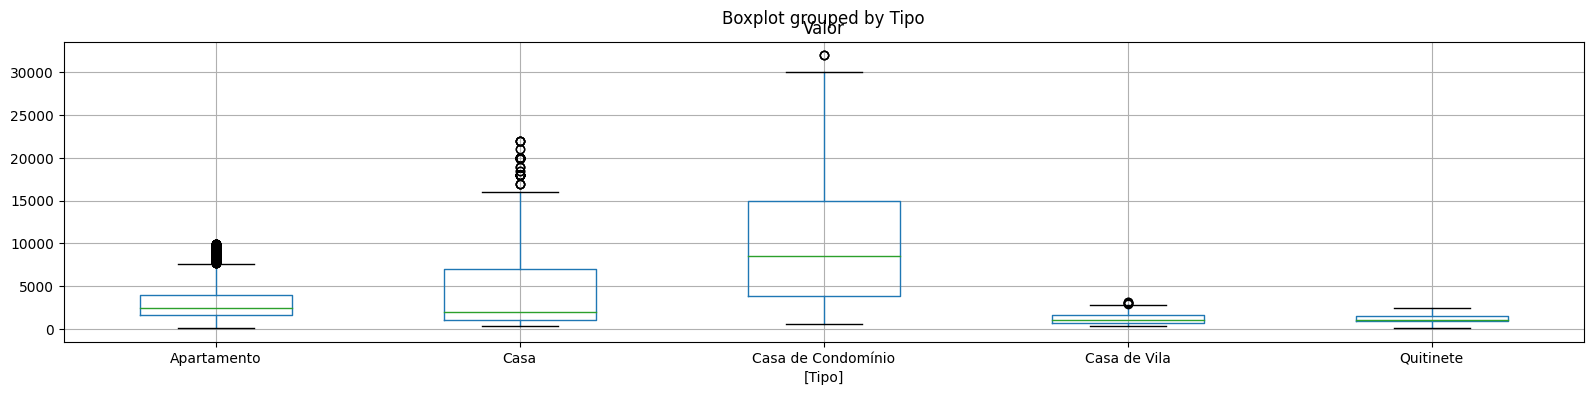

In [29]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [30]:
dados_new.to_csv('F:/Cursos/ALURA/Formação Data Science/Python Pandas - Tratando e analisando dados/ALURA - JUPYTER/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)